## Practicing building a convolutional network and training it using ImageDataGenerator

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
tf.__version__

'2.3.0'

In [4]:
import os
import zipfile
import random
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [10]:
import wget

In [18]:
os.mkdir('tmp')

In [33]:
!python -m wget -o "tmp/" "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"


Saved under tmp//kagglecatsanddogs_3367a.zip


In [36]:
localzip = 'tmp/kagglecatsanddogs_3367a.zip'
zipref = zipfile.ZipFile(localzip, mode='r')
zipref.extractall('tmp/')
zipref.close()

In [39]:
print(len(os.listdir('tmp/PetImages/Cat')))
print(len(os.listdir('tmp/PetImages/Dog')))

12501
12501


In [40]:
os.mkdir('cats-vs-dogs')
os.mkdir('cats-vs-dogs/train')
os.mkdir('cats-vs-dogs/test')
os.mkdir('cats-vs-dogs/train/cats')
os.mkdir('cats-vs-dogs/train/dogs')
os.mkdir('cats-vs-dogs/test/cats')
os.mkdir('cats-vs-dogs/test/dogs')

In [41]:
def split_data(SOURCEDIR, TRAININGDIR, TESTINGDIR, SPLIT_SIZE):
    file_names = os.listdir(SOURCEDIR)
    file_names_random = random.sample(file_names, len(file_names))
    
    for file in file_names_random[:int(SPLIT_SIZE*len(file_names_random))]:
        if os.path.getsize(SOURCEDIR+file) > 0:
            copyfile(SOURCEDIR+file, TRAININGDIR+file)
    
    for file in file_names_random[int(SPLIT_SIZE*len(file_names_random)):]:
        if os.path.getsize(SOURCEDIR+file) > 0:
            copyfile(SOURCEDIR+file, TESTINGDIR+file)
    
    traincount = len(os.listdir(TRAININGDIR))
    testcount = len(os.listdir(TESTINGDIR))
    
    return f"Files in training folder: {traincount}, testing folder: {testcount}"    

In [43]:
split_data('tmp/PetImages/Cat/', 'cats-vs-dogs/train/cats/', 'cats-vs-dogs/test/cats/', 0.9)

'Files in training folder: 11249, testing folder: 1251'

In [44]:
split_data('tmp/PetImages/Dog/', 'cats-vs-dogs/train/dogs/', 'cats-vs-dogs/test/dogs/', 0.9)

'Files in training folder: 11249, testing folder: 1251'

In [57]:
traindir = 'cats-vs-dogs/train'
train_datagen = ImageDataGenerator(rescale=1./255)
train_datagenerator = train_datagen.flow_from_directory(traindir, target_size=(150,150), batch_size = 10, class_mode='binary')

Found 22496 images belonging to 2 classes.


In [58]:
testdir = 'cats-vs-dogs/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagenerator = test_datagen.flow_from_directory(testdir, target_size=(150,150), batch_size = 10, class_mode='binary')

Found 2502 images belonging to 2 classes.


In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), strides= (2,2), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 74, 74, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9248)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1183872   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [61]:
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
history = model.fit_generator(train_datagenerator, epochs=5, verbose=1, validation_data=test_datagenerator)

Epoch 1/5
1151/2250 [==============>...............] - ETA: 3:05 - loss: 0.6350 - accuracy: 0.6469

e:\DataScience\tf\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
e:\DataScience\tf\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
e:\DataScience\tf\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
e:\DataScience\tf\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
e:\DataScience\tf\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skippin

2250/2250 [==============================] - 532s 237ms/step - loss: 0.5965 - accuracy: 0.6842 - val_loss: 0.5128 - val_accuracy: 0.7474
Epoch 2/5
2250/2250 [==============================] - 422s 187ms/step - loss: 0.4994 - accuracy: 0.7633 - val_loss: 0.5048 - val_accuracy: 0.7698
Epoch 3/5
2250/2250 [==============================] - 401s 178ms/step - loss: 0.4665 - accuracy: 0.7859 - val_loss: 0.4941 - val_accuracy: 0.7814
Epoch 4/5
2250/2250 [==============================] - 403s 179ms/step - loss: 0.4382 - accuracy: 0.8035 - val_loss: 0.4339 - val_accuracy: 0.8114
Epoch 5/5
2250/2250 [==============================] - 585s 260ms/step - loss: 0.4191 - accuracy: 0.8143 - val_loss: 0.4585 - val_accuracy: 0.7954


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Training and Validation Loss')

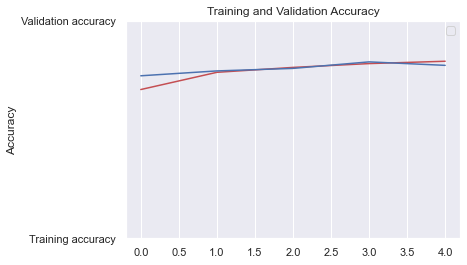

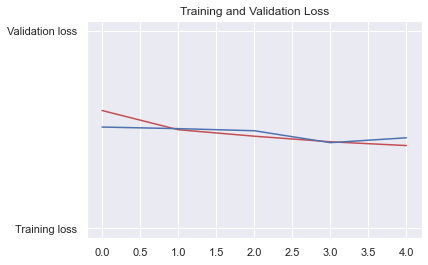

In [67]:
#Print model statistics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
n_epochs = range(len(acc))

import matplotlib.image as mpimg

plt.plot(n_epochs, acc, 'r', 'Training accuracy')
plt.plot(n_epochs, val_acc, 'b', 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.legend()
plt.figure()


plt.plot(n_epochs, loss, 'r', 'Training loss')
plt.plot(n_epochs, val_loss, 'b', 'Validation loss')
plt.title('Training and Validation Loss')

In [71]:
from tensorflow.keras.preprocessing import image
img = image.load_img('2.jpg',target_size=(150,150,3))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
classes = model.predict(x)
print(classes)

[[0.]]


In [119]:
classes = test_datagenerator.class_indices

In [120]:
classes = {v: k for (k,v) in classes.items()}

In [121]:
classes

{0: 'cats', 1: 'dogs'}

In [75]:
if classes[0]>0.5:
    print("It's a Dog!")
else:
    print("It's a Cat!")

It's a Cat!


In [91]:
testing_gen = ImageDataGenerator(rescale=1./255)
testing_generator = testing_gen.flow_from_directory('test_images/', target_size=(150,150), batch_size=4, class_mode=None,shuffle=False)

Found 12 images belonging to 1 classes.


In [92]:
predictions = model.predict_generator(testing_generator, steps=3, verbose=1)

3/3 [==============================] - 0s 10ms/step


In [104]:
pred = list(np.squeeze(predictions))

In [105]:
file_names = testing_generator.filenames

In [106]:
preds = [1 if pred>0.5 else 0 for pred in pred]

In [122]:
class_indices = [classes[preds] for preds in preds]

In [123]:
df = pd.DataFrame({'Filenames': file_names, 'Probabilities':pred, 
                   'Predictions': preds, 
                   'Classes': class_indices})

In [124]:
df

,Filenames,Probabilities,Predictions,Classes
0,pred\2.jpg,0.103353,0,cats
1,pred\235.jpg,0.001603,0,cats
2,pred\241.jpg,0.419287,0,cats
3,pred\244.jpg,0.215577,0,cats
4,pred\257.jpg,0.511495,1,dogs
5,pred\267.jpg,0.280132,0,cats
6,pred\29.jpg,0.186521,0,cats
7,pred\292.jpg,0.306530,0,cats
8,pred\30.jpg,0.903336,1,dogs
9,pred\31.jpg,0.403049,0,cats


### Image augmentation practice

In [132]:
train_generator = ImageDataGenerator(    
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [133]:
test_generator = ImageDataGenerator(    
    rescale=1./255
)

In [134]:
train_datagenerator = train_generator.flow_from_directory(traindir, target_size=(100,100), batch_size = 10, class_mode='binary')

Found 22496 images belonging to 2 classes.


In [136]:
test_datagenerator = test_generator.flow_from_directory(testdir, target_size=(100,100), batch_size = 10, class_mode='binary')

Found 2502 images belonging to 2 classes.


In [137]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), strides= (2,2), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 49, 49, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               495744    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [139]:
from tensorflow.keras.optimizers import Adam

In [141]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [142]:
history = model.fit_generator(train_datagenerator, epochs=10, verbose=1, validation_data=test_datagenerator)

Epoch 1/10
 303/2250 [===>..........................] - ETA: 7:23 - loss: 0.6980 - accuracy: 0.5086

e:\DataScience\tf\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
e:\DataScience\tf\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
e:\DataScience\tf\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
e:\DataScience\tf\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
e:\DataScience\tf\lib\site-packages\PIL\TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skippin

2250/2250 [==============================] - 656s 292ms/step - loss: 0.6808 - accuracy: 0.5648 - val_loss: 0.6601 - val_accuracy: 0.6019
Epoch 2/10
2250/2250 [==============================] - 434s 193ms/step - loss: 0.6196 - accuracy: 0.6565 - val_loss: 0.5788 - val_accuracy: 0.6926
Epoch 3/10
2250/2250 [==============================] - 357s 159ms/step - loss: 0.5717 - accuracy: 0.6970 - val_loss: 0.5964 - val_accuracy: 0.6775
Epoch 4/10
2250/2250 [==============================] - 383s 170ms/step - loss: 0.5535 - accuracy: 0.7139 - val_loss: 0.5301 - val_accuracy: 0.7358
Epoch 5/10
2250/2250 [==============================] - 789s 351ms/step - loss: 0.5415 - accuracy: 0.7236 - val_loss: 0.5237 - val_accuracy: 0.7434
Epoch 6/10
2250/2250 [==============================] - 548s 244ms/step - loss: 0.5266 - accuracy: 0.7362 - val_loss: 0.5041 - val_accuracy: 0.7474
Epoch 7/10
2250/2250 [==============================] - 1140s 507ms/step - loss: 0.5197 - accuracy: 0.7409 - val_loss: 0.48

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Training and Validation Loss')

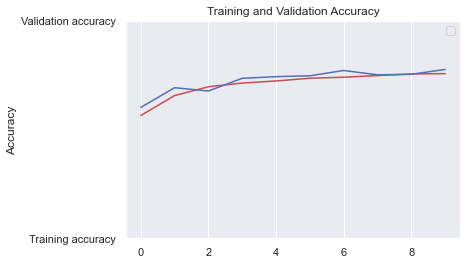

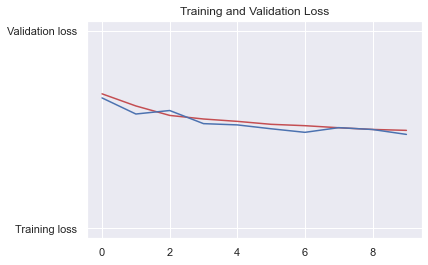

In [143]:
#Print model statistics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
n_epochs = range(len(acc))

import matplotlib.image as mpimg

plt.plot(n_epochs, acc, 'r', 'Training accuracy')
plt.plot(n_epochs, val_acc, 'b', 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.legend()
plt.figure()


plt.plot(n_epochs, loss, 'r', 'Training loss')
plt.plot(n_epochs, val_loss, 'b', 'Validation loss')
plt.title('Training and Validation Loss')

In [ ]:
Class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
    keys = list(logs.keys())
    print("End epoch {} of training; got log keys: {}".format(epoch, keys))
    if logs['accuracy']>0.9:
        self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit_generator(train_datagenerator, epochs=10, verbose=1, validation_data=test_datagenerator, callbacks=backs = [callbacks])